In [1]:
# import libraries
%matplotlib inline
import re
import os
import nltk
import time
import string
import pickle
import itertools
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
reviews_df = pd.read_csv("data/hasil-preprocessing-data.csv")
reviews_df.head(10)

,Unnamed: 0,stopword,sentiment
0,0,mudah,positive
1,1,aplikasi bantu karna daerah mksih yahh aplikas...,positive
2,2,bagus sehat,positive
3,3,tombol tuju nya gak aplikasi user friendly ban...,positive
4,4,mudah,positive
5,5,selamat malam aplikasi nya bagus manfaat aplik...,positive
6,6,puas aflikasi ecek orang,positive
7,7,aplikasi bantu karna daerah mksih yahh aplikas...,positive
8,8,bantu cepat layan jamin sehat klien,positive
9,9,aplikasi pantau kembang covid,positive


In [3]:
reviews_df = reviews_df.dropna()
reviews_df.head(10)

,Unnamed: 0,stopword,sentiment
0,0,mudah,positive
1,1,aplikasi bantu karna daerah mksih yahh aplikas...,positive
2,2,bagus sehat,positive
3,3,tombol tuju nya gak aplikasi user friendly ban...,positive
4,4,mudah,positive
5,5,selamat malam aplikasi nya bagus manfaat aplik...,positive
6,6,puas aflikasi ecek orang,positive
7,7,aplikasi bantu karna daerah mksih yahh aplikas...,positive
8,8,bantu cepat layan jamin sehat klien,positive
9,9,aplikasi pantau kembang covid,positive


In [5]:
X = reviews_df['stopword']
y = reviews_df['sentiment']


In [54]:
def svmPredict(Xtr, Ytr, Xte, reg_parm = 0.1, epochs = 100000):
    
    n_train, d_train = np.shape(Xtr)
    
    if any(np.abs(Ytr) != 1):
        print("The values of Ytr should be +1 or -1.")
        return -1
    
    
    
    w = np.zeros(d_train)

    
    for epoch in range(1, epochs):
        learning_rate = 1/epoch        # variable learning rate
        for i, x in enumerate(Xtr):
            if (Ytr[i] * np.dot(Xtr[i], w)) < 1:
                w = (1 - learning_rate)*w + (learning_rate)*reg_parm*Ytr[i]*Xtr[i]
            else:
                w = (1 - learning_rate)*w
                
        
    Ypred = np.dot(Xte, w)
    print(Ypred)
    return Ypred, w

In [55]:
def linearBinaryClass(n, low_D, high_D, m, q):

    X = np.zeros((n, 2))
    Y = np.zeros(n)
    for i in range(2):
        X[:,i] = np.random.uniform(low_D, high_D, size=n)
        print(m)
        
    Y[X[:,1] - (X[:,0] * m + q) > 0] = 1 
    Y[X[:,1] - (X[:,0] * m + q) < 0] = -1
    
    return X,Y

In [56]:
def flipLabels(Y, P):
    if P < 1 or P > 100:
        print("p should be a percentage value between 0 and 100.")
        return -1

    if any(np.abs(Y) != 1):
        print("The values of Ytr should be +1 or -1.")
        return -1

    Y_noisy = np.copy(np.squeeze(Y))
    if Y_noisy.ndim > 1:
        print("Please supply a label array with only one dimension")
        return -1

    n = Y_noisy.size
    n_flips = int(np.floor(n * P / 100))
    idx_to_flip = np.random.choice(n, size=n_flips, replace=False)
    Y_noisy[idx_to_flip] = -Y_noisy[idx_to_flip]

    return Y_noisy

In [57]:
X, Y = linearBinaryClass(200, 0, 20, 0.8, 0)
Y = flipLabels(Y, 5)    # 5% white noise in data

0.8
0.8


[ 1.30189526  0.08653081  2.99895274 -2.02994356  0.88780133 -2.2912761
 -4.06370287  5.16081526 -1.43609317  3.78386931  4.19134091 -0.11978139
 -2.11015557 -1.88727798  1.16023495 -0.20172268 -2.87573102 -0.22824706
  1.07376763 -3.2301859   2.33817082 -2.70032247  3.16797064  4.68387561
  2.25164259  1.99438563 -1.71797895 -1.8932977  -1.33282764 -3.66313996
  5.9100732   0.97823018  1.68803759  4.57856978 -1.52774449 -0.64763867
  2.68053445  2.12521711  1.8820773   4.66611868]
[-0.32603119  0.41236106]


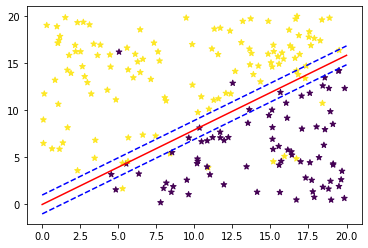

In [60]:
# % of data to be used as training
training_percentage = 80
size_of_input_data = X.shape[0]

Xtr = X[0 : (int(size_of_input_data*training_percentage/100)), :]
Ytr = Y[0: (int(size_of_input_data*training_percentage/100))]
Xte = X[(int(size_of_input_data*training_percentage/100)) : , :]
Yte = Y[(int(size_of_input_data*training_percentage/100)) : ]

reg_param = 40
Y_pred, w = svmPredict(Xtr, Ytr, Xte, reg_param) 
print (w)

# Visualization of the model

plt.scatter(np.array(X[:,0]), np.array(X[:,1]),marker='*',c=Y)

# Create the hyperplane

a = -w[0] / w[1]
xx = np.linspace(0,20)
yy = a * xx 

# Plot the hyperplane
plt.plot(xx, yy, color='red')

# Plot support vectors 
plt.plot(xx, (yy+1), linestyle='--', color='blue')
plt.plot(xx, (yy-1), linestyle='--', color='blue')

# plt.show();